In [1]:
#Set-A1
#Student ID: 076

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

In [2]:
data = {
    "Student_ID": list(range(1, 21)),
    "Exam_Score": [93,83,69,62,75,93,73,77,65,65,
                   78,90,94,78,57,76,56,78,84,92]
}

df = pd.DataFrame(data)
scores = df["Exam_Score"].values
n = len(scores)


# Basic Statistics

mean_score = np.mean(scores)
pop_variance = np.var(scores, ddof=0)
sample_variance = np.var(scores, ddof=1)
pop_std = np.sqrt(pop_variance)
sample_std = np.sqrt(sample_variance)

print("=== Basic Statistics ===")
print(f"Number of Students (n): {n}")
print(f"Mean = {mean_score:.4f}")
print(f"Population Variance = {pop_variance:.4f}")
print(f"Sample Variance = {sample_variance:.4f}")
print(f"Population Std Dev = {pop_std:.4f}")
print(f"Sample Std Dev = {sample_std:.4f}")


=== Basic Statistics ===
Number of Students (n): 20
Mean = 76.9000
Population Variance = 136.0900
Sample Variance = 143.2526
Population Std Dev = 11.6658
Sample Std Dev = 11.9688


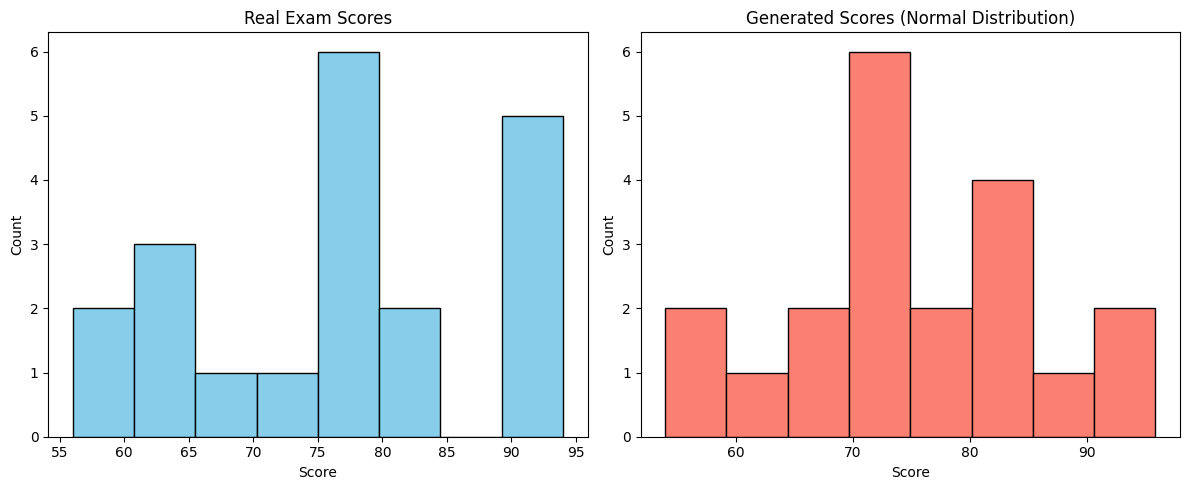

In [3]:
# Random Number Generation

np.random.seed(42)
generated_scores = np.random.normal(loc=mean_score, scale=sample_std, size=n)

# Plot real vs generated data
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(scores, bins=8, color='skyblue', edgecolor='black')
plt.title("Real Exam Scores")
plt.xlabel("Score")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(generated_scores, bins=8, color='salmon', edgecolor='black')
plt.title("Generated Scores (Normal Distribution)")
plt.xlabel("Score")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [4]:
# Monte Carlo Simulation

samples = np.random.normal(loc=mean_score, scale=sample_std, size=100_000)
prob_ge_75 = np.mean(samples >= 75)

print("\n=== Monte Carlo Simulation ===")
print(f"Estimated Probability (Score ≥ 75): {prob_ge_75:.4f}")


# Hypothesis Testing

# Student ID = 076 → μ0 = (76 % 50) + 50 = 76
mu0 = (76 % 50) + 50

t_stat, p_value_two_sided = stats.ttest_1samp(scores, popmean=mu0)
p_value_one_sided = p_value_two_sided / 2 if t_stat > 0 else 1 - (p_value_two_sided / 2)

print("\n=== Hypothesis Testing ===")
print(f"H0: μ = {mu0}")
print(f"H1: μ ≠ {mu0}")
print(f"Sample Mean = {mean_score:.4f}")
print(f"t-statistic = {t_stat:.4f}")
print(f"Two-sided p-value = {p_value_two_sided:.6f}")
print(f"One-sided p-value (mean > {mu0}) = {p_value_one_sided:.6f}")



=== Monte Carlo Simulation ===
Estimated Probability (Score ≥ 75): 0.5637

=== Hypothesis Testing ===
H0: μ = 76
H1: μ ≠ 76
Sample Mean = 76.9000
t-statistic = 0.3363
Two-sided p-value = 0.740342
One-sided p-value (mean > 76) = 0.370171


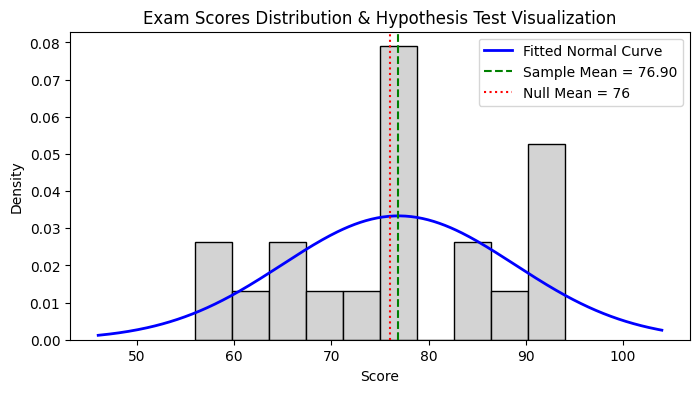

In [5]:
# Visualization for Hypothesis Test

plt.figure(figsize=(8,4))
plt.hist(scores, bins=10, density=True, color='lightgray', edgecolor='black')

# Fitted normal curve
x = np.linspace(min(scores)-10, max(scores)+10, 300)
pdf = (1/(sample_std*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - mean_score)/sample_std)**2)
plt.plot(x, pdf, color='blue', linewidth=2, label="Fitted Normal Curve")

plt.axvline(mean_score, color='green', linestyle='--', linewidth=1.5, label=f"Sample Mean = {mean_score:.2f}")
plt.axvline(mu0, color='red', linestyle=':', linewidth=1.5, label=f"Null Mean = {mu0}")

plt.title("Exam Scores Distribution & Hypothesis Test Visualization")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.show()

In [7]:
# Interpretation Summary

print("\n=== Conclusion ===")
if p_value_two_sided < 0.05:
    print(f" Reject H0: The average exam score is significantly different from {mu0}.")
else:
    print(f" Fail to Reject H0: No significant difference from {mu0}.")

print(f"\nInterpretation: The mean exam score is {mean_score:.2f}, which is close to {mu0}.")
print("The p-value is large, meaning the difference is not statistically significant at α = 0.05.")
print(f"The Monte Carlo simulation shows ~{prob_ge_75*100:.1f}% chance a student scores ≥ 75.")


=== Conclusion ===
 Fail to Reject H0: No significant difference from 76.

Interpretation: The mean exam score is 76.90, which is close to 76.
The p-value is large, meaning the difference is not statistically significant at α = 0.05.
The Monte Carlo simulation shows ~56.4% chance a student scores ≥ 75.
